In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
from fuzzywuzzy import process
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import sys
!{sys.executable} -m pip install fuzzywuzzy python-Levenshtein

In [3]:
!pip install rapidfuzz
from rapidfuzz import process, fuzz

In [4]:
from fuzzywuzzy import fuzz, process

print(fuzz.ratio("Python", "python"))

83


In [5]:
from fuzzywuzzy import fuzz
print(fuzz.ratio("Data Analyst", "Data Analysis"))


88


In [6]:
df = pd.read_csv("C:\\Users\\there\\OneDrive\\Desktop\\Bank data Project.csv")
df

,Customer_ID,Customer_Name,Age,Gender,Occupation,Annual_Income,City,State,Loan_Type,Loan_Amount,...,EMI_Amount,Loan_Term,Loan_Approval_Date,Mobile_Number,Bank_Branch,Account_Balance,Interest_Rate,Loan_Repayment_Status,Disbursed_Amount,Branch_Manager
0,CUST00001,Ivan aWrrior,35,Other,Self-employed,904251,GIRIDIH,aKrnataka,Home Loan,4292053,...,"45,912.85",360,2023-09-52,2452966579,BANGALORE BRANCH,330987,12.53,Completed,4292053,Ayesha Bhattacharyya
1,CUST00002,shamik bhardwaj,70,Female,Salaride,2176409,Delhi,Karnataka,education loan,739452,...,"13,198.19",84,8/6/2024,9.20E+11,Mumbai Branch,111656,12.37,Pending,739452,Adah Sha
2,CUST00003,uPrab Samra,36,Male,Student,418339,Raichur,MAHARASHTRA,Car Loan,802308,...,"15,944.93",72,7/7/2042,9.19E+11,Bangalore Branch,282128,12.62,Completed,802308,Indrajit Batra
3,CUST00004,Samar Balay,42,Female,Self-employed,1249905,TIRUPPUR,karnataka,Gold Loan,234488,...,"7,805.61",36,2021-09-08,9.10E+11,Delhi Branch,19956,12.15,Pending,234488,Jayan Kuruvilla
4,CUST00005,Madhup Walla,53,Other,Unemployed,1081891,Hazaribagh,Wes tBengal,Education Loan,509615,...,"8,074.51",84,2020-12-30,9.14E+11,Mumbai Branch,124663,8.52,Pending,509615,Dhanush Raju
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230479,CUST230480,Indrajti Acharya,68,Male,Salraied,2141385,Bhopal,Tamil Naud,CAR LOAN,1023340,...,"34,466.38",36,5/20/2022,9.17E+11,Bangalore Branch,154080,12.97,Pending,1023340,Ana yShah
230480,CUST230481,Onkar Vala,59,Female,Retired,1619705,Mysore,Tamil Naud,Personal Loan,636396,...,"57,395.34",12,7/18/2024,9.13E+11,Kolkaat Branch,480904,14.85,Pending,636396,Hee rBadal
230481,CUST230482,Kanav Sahni,28,Female,salaried,2207685,Dugr,MAHARASHTRA,Persona lLoan,540131,...,"47,386.59",12,3/17/2023,5430686383,DELHI BRANCH,116009,9.60,Completed,540131,Hridaan Ganesh
230482,CUST230483,Manikya Handa,62,Other,Salaried,1593678,Dindiugl,Karnataka,Home Loan,3241096,...,"39,428.14",360,6/26/2022,7297028102,Mumbai Brnach,249823,14.40,Completed,3241096,Tejas Dayal


In [7]:
df.shape

(230484, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230484 entries, 0 to 230483
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_ID            230484 non-null  object 
 1   Customer_Name          230484 non-null  object 
 2   Age                    230484 non-null  int64  
 3   Gender                 230484 non-null  object 
 4   Occupation             230484 non-null  object 
 5   Annual_Income          230484 non-null  int64  
 6   City                   230484 non-null  object 
 7   State                  230484 non-null  object 
 8   Loan_Type              230484 non-null  object 
 9   Loan_Amount            230484 non-null  int64  
 10  Loan_Status            230484 non-null  object 
 11  Credit_Score           230484 non-null  int64  
 12  EMI_Amount             230484 non-null  float64
 13  Loan_Term              230484 non-null  int64  
 14  Loan_Approval_Date     230484 non-nu

In [9]:
df.describe()

,Age,Annual_Income,Loan_Amount,Credit_Score,EMI_Amount,Loan_Term,Account_Balance,Interest_Rate,Disbursed_Amount
count,"230,484.00","230,484.00","230,484.00","230,484.00","230,484.00","230,484.00","230,484.00","230,484.00","230,484.00"
mean,44.01,"1,348,861.08","1,097,855.98",575.14,"25,211.53",84.28,"252,676.15",11.49,"1,097,855.98"
std,15.29,"664,284.38","1,079,367.92",158.92,"17,742.12",89.29,"143,048.51",2.02,"1,079,367.92"
min,18.00,"200,004.00","50,010.00",300.00,"1,233.50",12.00,"5,002.00",8.00,"50,010.00"
25%,31.00,"772,936.00","429,510.00",438.00,"11,631.51",36.00,"128,298.50",9.75,"429,510.00"
50%,44.00,"1,346,870.50","741,555.00",575.00,"20,564.58",60.00,"252,734.50",11.49,"741,555.00"
75%,57.00,"1,924,250.00","1,259,158.75",713.00,"34,967.34",84.00,"376,612.00",13.24,"1,259,158.75"
max,70.00,"2,499,999.00","4,999,960.00",850.00,"90,215.92",360.00,"499,995.00",15.00,"4,999,960.00"


In [10]:
# To find all duplicate rows
duplicates = df[df.duplicated()]

print("Total duplicate rows:", duplicates.shape[0])
display(duplicates.head())


Total duplicate rows: 0


,Customer_ID,Customer_Name,Age,Gender,Occupation,Annual_Income,City,State,Loan_Type,Loan_Amount,...,EMI_Amount,Loan_Term,Loan_Approval_Date,Mobile_Number,Bank_Branch,Account_Balance,Interest_Rate,Loan_Repayment_Status,Disbursed_Amount,Branch_Manager


In [11]:
duplicates = df[df.duplicated(subset=['Customer_ID'])]
display(duplicates)


,Customer_ID,Customer_Name,Age,Gender,Occupation,Annual_Income,City,State,Loan_Type,Loan_Amount,...,EMI_Amount,Loan_Term,Loan_Approval_Date,Mobile_Number,Bank_Branch,Account_Balance,Interest_Rate,Loan_Repayment_Status,Disbursed_Amount,Branch_Manager


In [12]:
df[df.duplicated(subset=['Customer_Name', 'Loan_Type', 'Loan_Amount', 'City'], keep=False)]


,Customer_ID,Customer_Name,Age,Gender,Occupation,Annual_Income,City,State,Loan_Type,Loan_Amount,...,EMI_Amount,Loan_Term,Loan_Approval_Date,Mobile_Number,Bank_Branch,Account_Balance,Interest_Rate,Loan_Repayment_Status,Disbursed_Amount,Branch_Manager


In [13]:
df['Age'].describe()

count   230,484.00
mean         44.01
std          15.29
min          18.00
25%          31.00
50%          44.00
75%          57.00
max          70.00
Name: Age, dtype: float64

<Axes: ylabel='Age'>

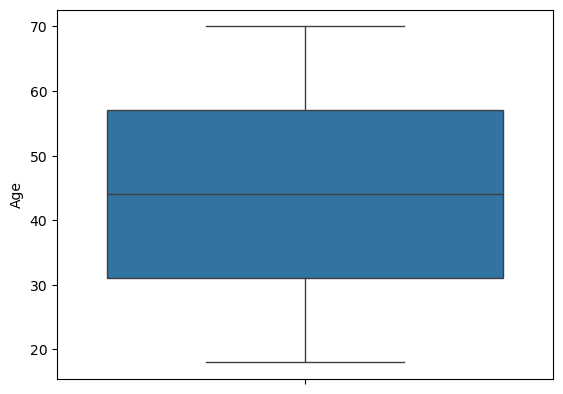

In [14]:
sns.boxplot(df['Age'])

In [15]:
df['Annual_Income'].describe()

count     230,484.00
mean    1,348,861.08
std       664,284.38
min       200,004.00
25%       772,936.00
50%     1,346,870.50
75%     1,924,250.00
max     2,499,999.00
Name: Annual_Income, dtype: float64

In [16]:
df['Annual_Income'].min()

200004

<Axes: ylabel='Annual_Income'>

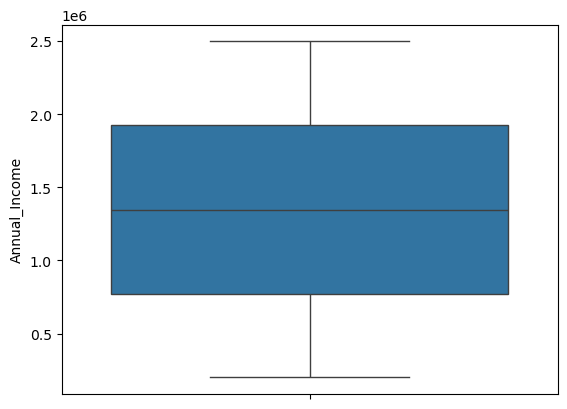

In [17]:
sns.boxplot(df['Annual_Income'])

In [18]:
df['Loan_Amount'].describe()

count     230,484.00
mean    1,097,855.98
std     1,079,367.92
min        50,010.00
25%       429,510.00
50%       741,555.00
75%     1,259,158.75
max     4,999,960.00
Name: Loan_Amount, dtype: float64

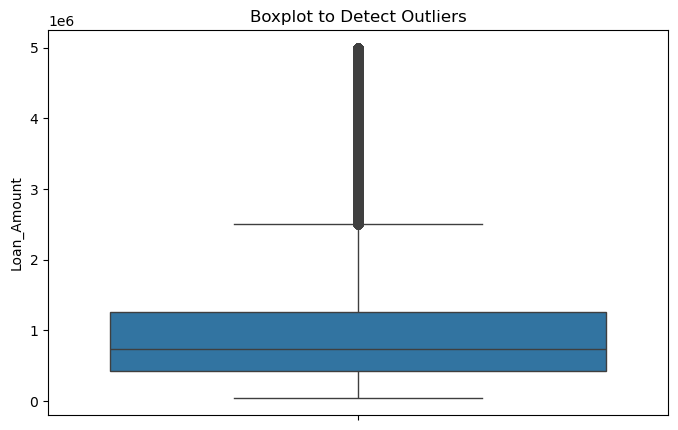

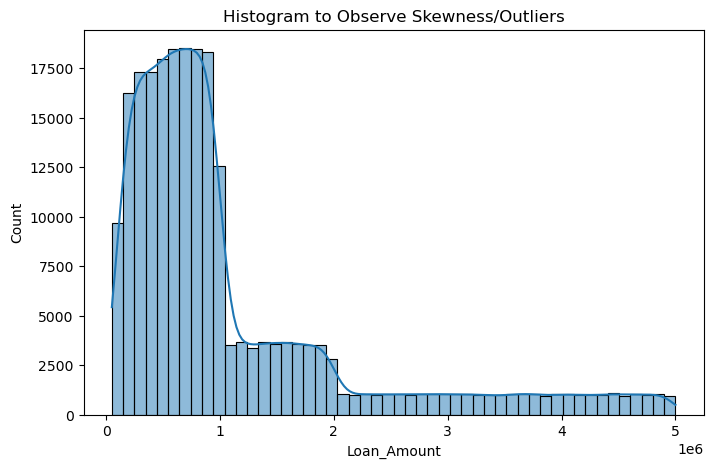

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(y=df['Loan_Amount'])
plt.title('Boxplot to Detect Outliers')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Loan_Amount'], bins=50, kde=True)
plt.title('Histogram to Observe Skewness/Outliers')
plt.show()


In [20]:
lower_limit = df['Loan_Amount'].quantile(0.05)
upper_limit = df['Loan_Amount'].quantile(0.85)
df_trimmed = df[(df['Loan_Amount'] >= lower_limit) & (df['Loan_Amount'] <= upper_limit)]


<Axes: ylabel='Loan_Amount'>

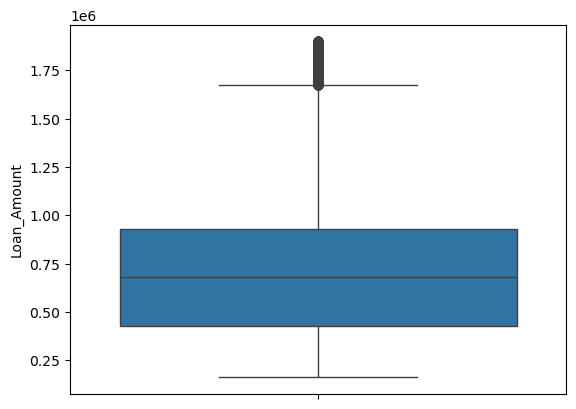

In [21]:
sns.boxplot(y=df_trimmed['Loan_Amount'])

<Axes: ylabel='Loan_Amount'>

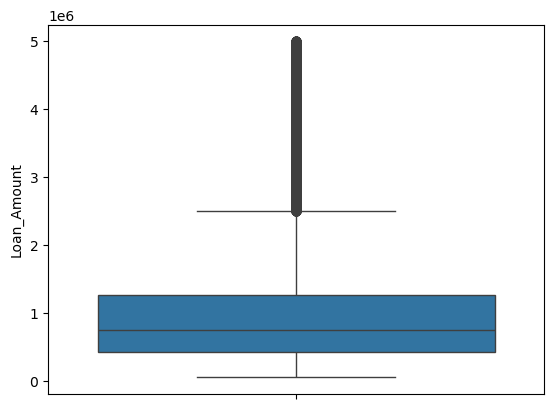

In [22]:
sns.boxplot(df['Loan_Amount'])

In [23]:
df['Credit_Score'].describe()

count   230,484.00
mean        575.14
std         158.92
min         300.00
25%         438.00
50%         575.00
75%         713.00
max         850.00
Name: Credit_Score, dtype: float64

<Axes: ylabel='Credit_Score'>

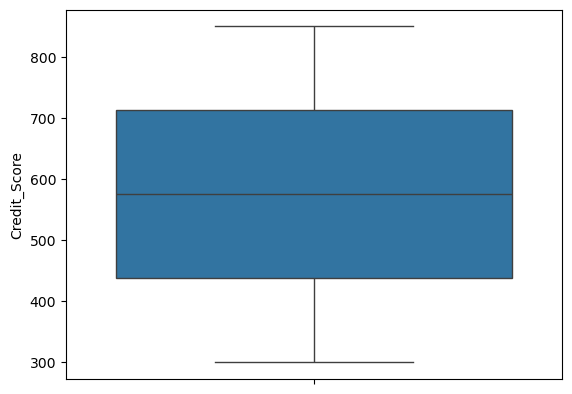

In [24]:
sns.boxplot(df['Credit_Score'])

In [25]:
df['EMI_Amount'].describe()

count   230,484.00
mean     25,211.53
std      17,742.12
min       1,233.50
25%      11,631.51
50%      20,564.58
75%      34,967.34
max      90,215.92
Name: EMI_Amount, dtype: float64

<Axes: ylabel='EMI_Amount'>

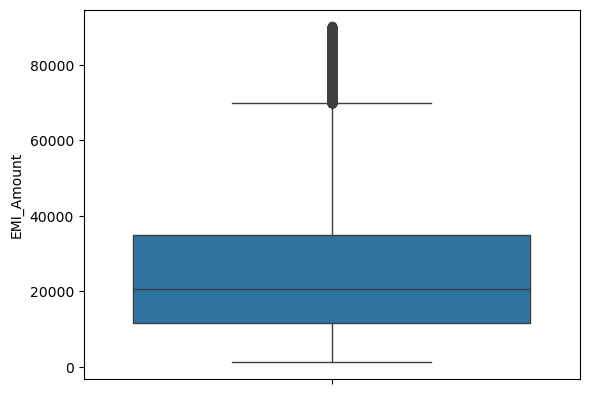

In [26]:
sns.boxplot(df['EMI_Amount'])

In [27]:
df['Loan_Term'].describe()

count   230,484.00
mean         84.28
std          89.29
min          12.00
25%          36.00
50%          60.00
75%          84.00
max         360.00
Name: Loan_Term, dtype: float64

<Axes: ylabel='Loan_Term'>

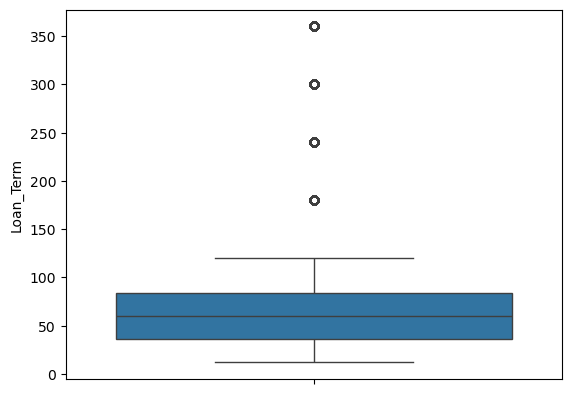

In [28]:
sns.boxplot(df['Loan_Term'])

In [29]:
df['Account_Balance'].describe()

count   230,484.00
mean    252,676.15
std     143,048.51
min       5,002.00
25%     128,298.50
50%     252,734.50
75%     376,612.00
max     499,995.00
Name: Account_Balance, dtype: float64

<Axes: ylabel='Account_Balance'>

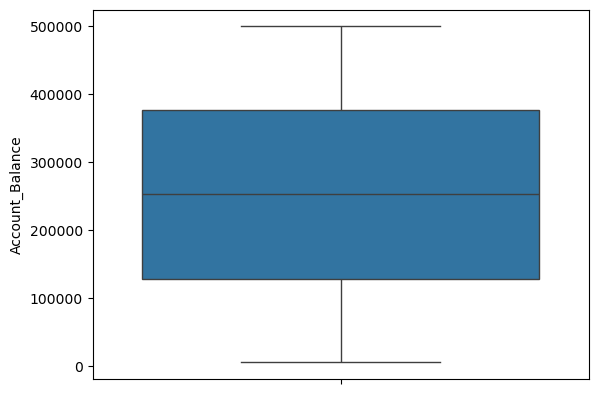

In [30]:
sns.boxplot(df['Account_Balance'])

In [31]:
df['Interest_Rate'].describe()

count   230,484.00
mean         11.49
std           2.02
min           8.00
25%           9.75
50%          11.49
75%          13.24
max          15.00
Name: Interest_Rate, dtype: float64

<Axes: xlabel='Interest_Rate', ylabel='Count'>

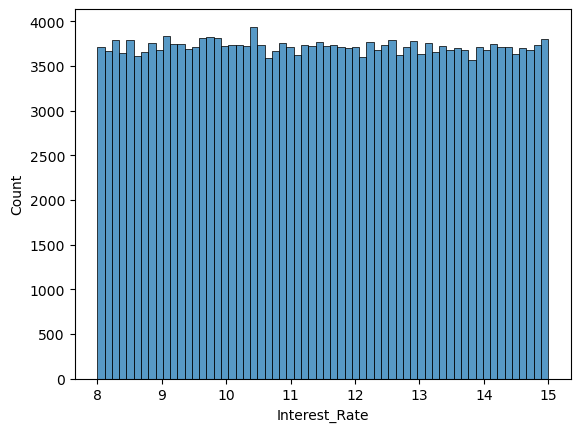

In [32]:
sns.histplot(df['Interest_Rate'])

In [33]:
df['Disbursed_Amount'].describe()

count     230,484.00
mean    1,097,855.98
std     1,079,367.92
min        50,010.00
25%       429,510.00
50%       741,555.00
75%     1,259,158.75
max     4,999,960.00
Name: Disbursed_Amount, dtype: float64

<Axes: xlabel='Disbursed_Amount', ylabel='Count'>

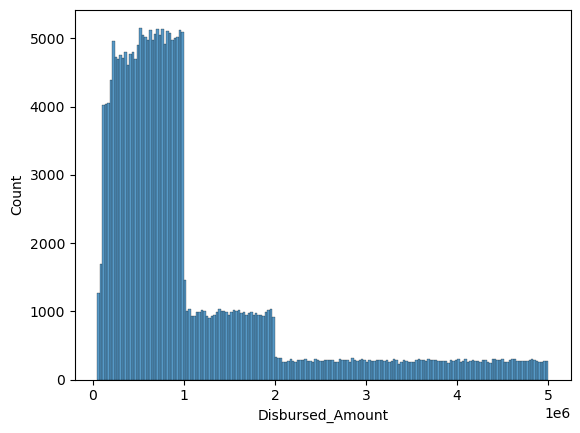

In [34]:
sns.histplot(df['Disbursed_Amount'])

In [35]:
df['Gender'].value_counts()

Gender
Male      77146
Female    76744
Other     76594
Name: count, dtype: int64

<Axes: ylabel='count'>

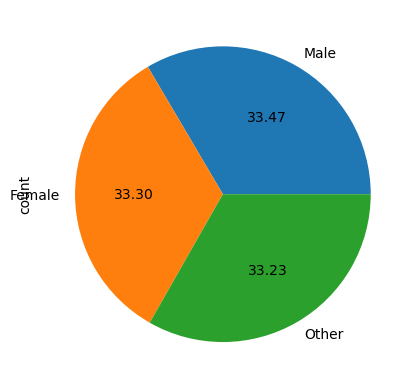

In [36]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [37]:
df['Occupation'].value_counts()

Occupation
Retired          11579
Self-employed    11459
Student          11417
Unemployed       11348
Salaried         11343
                 ...  
Selfe-mployed      945
Self-empolyed      940
Self-epmloyed      937
Self-emploeyd      918
eSlf-employed      867
Name: count, Length: 65, dtype: int64

In [38]:
df['Occupation'] = df['Occupation'].str.strip().str.title()

valid_Occupations = [
    'Self-employed','Student','Unemployed','Salaried','Retired'
]

def correct_Occupation(x):
    match = process.extractOne(x, valid_Occupations, scorer=fuzz.ratio)
    if match and match[1] >= 70:
        return match[0]
    else:
        return x

df['Occupation'] = df['Occupation'].apply(correct_Occupation)

In [39]:
df['Occupation'].value_counts()

Occupation
Retired          46216
Student          46150
Self-employed    46067
Unemployed       46028
Salaried         46023
Name: count, dtype: int64

Axes(0.1275,0.11;0.77x0.77)


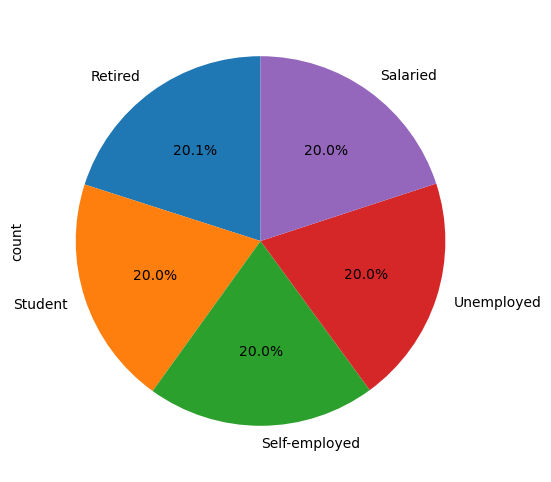

In [40]:
print(df['Occupation'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    startangle=90
))

In [ ]:
unique_names = df['City'].unique()

for name in unique_names:
    matches = process.extract(name, unique_names, scorer=fuzz.token_sort_ratio, limit=5)
    print(f"\nPossible matches for '{name}':")
    for match in matches:
        print(f"  {match}")



Possible matches for 'GIRIDIH':
  ('GIRIDIH', 100)
  ('Giridih', 100)
  (' Giridih ', 100)
  ('Giridih  ', 100)
  ('giridih', 100)

Possible matches for ' Delhi ':
  (' Delhi ', 100)
  ('Delhi', 100)
  ('Delhi  ', 100)
  ('delhi', 100)
  ('DELHI', 100)

Possible matches for 'Raichur  ':
  ('Raichur  ', 100)
  (' Raichur ', 100)
  ('Raichur', 100)
  ('RAICHUR', 100)
  ('raichur', 100)

Possible matches for 'TIRUPPUR':
  ('TIRUPPUR', 100)
  ('Tiruppur', 100)
  (' Tiruppur ', 100)
  ('Tiruppur  ', 100)
  ('tiruppur', 100)

Possible matches for 'Hazaribagh':
  ('Hazaribagh', 100)
  (' Hazaribagh ', 100)
  ('HAZARIBAGH', 100)
  ('hazaribagh', 100)
  ('Hazaribagh  ', 100)

Possible matches for 'jehanabad':
  ('jehanabad', 100)
  ('Jehanabad', 100)
  (' Jehanabad ', 100)
  ('Jehanabad  ', 100)
  ('JEHANABAD', 100)

Possible matches for 'Eulru':
  ('Eulru', 100)
  ('ELURU', 80)
  ('Eluru  ', 80)
  ('Elruu', 80)
  (' Eluru ', 80)

Possible matches for 'Rajpur oSnarpur':
  ('Rajpur oSnarpur', 1

In [ ]:
from fuzzywuzzy import fuzz, process

def replace_similar_names(df, column, threshold=70):
    unique_names = df[column].dropna().unique()
    standardized = {}
    
    for name in unique_names:
        if name not in standardized:
            matches = process.extract(name, unique_names, scorer=fuzz.token_sort_ratio)
            
            # handle 2 or 3 value tuples safely
            for match_tuple in matches:
                match = match_tuple[0]
                score = match_tuple[1]
                
                if score >= threshold:
                    standardized[match] = name
                    
    df[column] = df[column].map(standardized).fillna(df[column])
    return df

# Example usage
df_clean = replace_similar_names(df, 'City')
print(df_clean)


In [ ]:
df['City'].value_counts()

In [ ]:
df.dtypes

In [ ]:
df['City'].value_counts()

In [41]:
df['State'].value_counts()

State
Uttar Pradesh     7573
Maharashtra       7386
West Bengal       7304
Delhi             7187
Karnataka         7160
                  ... 
Andhra Pradehs     536
Andhra Pradseh     524
Andhra Praedsh     524
Andhr aPradesh     523
AndhraP radesh     506
Name: count, Length: 113, dtype: int64

In [42]:
import pandas as pd
from rapidfuzz import process, fuzz  # ✅ faster replacement

# Basic cleaning
df['State'] = df['State'].str.strip().str.title()

valid_states = [
    'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
    'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
    'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
    'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
    'Uttarakhand', 'West Bengal', 'Delhi', 'Puducherry', 'Chandigarh', 'Jammu And Kashmir', 'Ladakh'
]

def correct_state(x):
    match = process.extractOne(x, valid_states, scorer=fuzz.ratio)
    if match and match[1] >= 0:
        return match[0]
    else:
        return x

df['State'] = df['State'].apply(correct_state)

In [43]:
df['State'].value_counts()

State
Maharashtra       29009
Karnataka         28987
West Bengal       28981
Delhi             28945
Andhra Pradesh    28873
Rajasthan         28714
Uttar Pradesh     28554
Tamil Nadu        28421
Name: count, dtype: int64

Axes(0.1275,0.11;0.77x0.77)


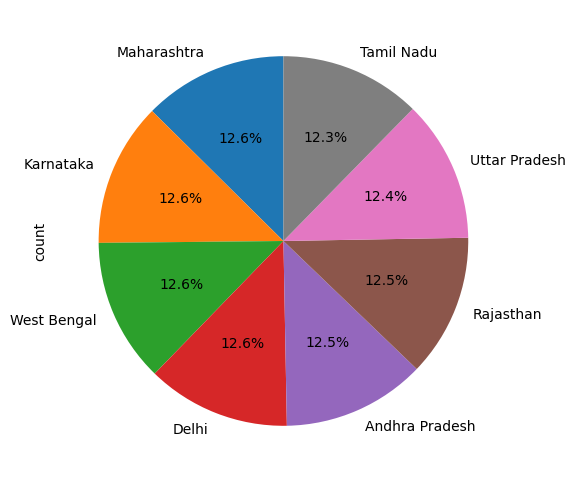

In [44]:
print(df['State'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    startangle=90
))

In [45]:
df['Loan_Type'].value_counts()

Loan_Type
Car Loan          11797
Home Loan         11661
Gold Loan         11545
Education Loan    11400
Personal Loan     11301
                  ...  
Educaiton Loan      858
Educatio nLoan      845
Educatino Loan      843
Eudcation Loan      837
dEucation Loan      816
Name: count, Length: 73, dtype: int64

In [46]:
df['Loan_Type'] = df['Loan_Type'].str.strip().str.title()
valid_LoanType = [
    'Car Loan','Home Loan','Education Loan','Personal Loan','Gold Loan'
]
def correct_LoanType(x):
    match = process.extractOne(x, valid_LoanType, scorer=fuzz.ratio)
    if match and match[1] >= 70:
        return match[0]
    else:
        return x

df['Loan_Type'] = df['Loan_Type'].apply(correct_LoanType)

In [47]:
df['Loan_Type'].value_counts()

Loan_Type
Car Loan          46364
Home Loan         46361
Education Loan    45988
Gold Loan         45984
Personal Loan     45787
Name: count, dtype: int64

Axes(0.1275,0.11;0.77x0.77)


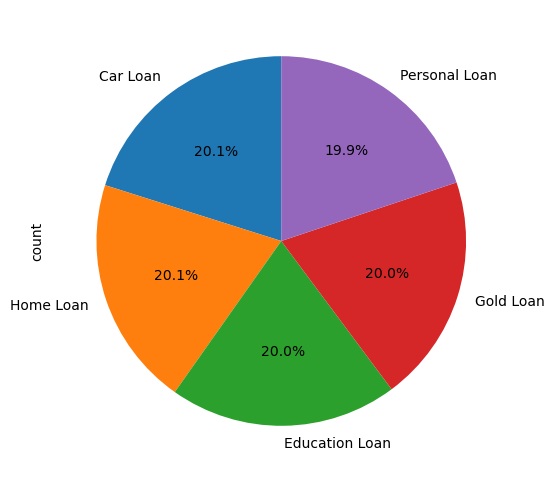

In [48]:
print(df['Loan_Type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    startangle=90
))

In [49]:
df['Loan_Status'].value_counts()

Loan_Status
Closed     76949
Active     76832
Default    76703
Name: count, dtype: int64

Axes(0.1275,0.11;0.77x0.77)


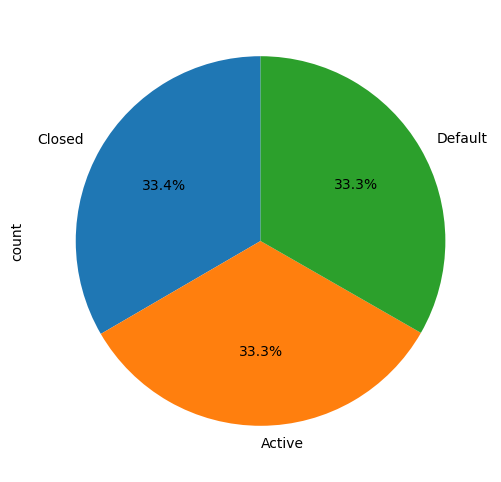

In [50]:
print(df['Loan_Status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    startangle=90
))

In [51]:
df['Bank_Branch'].value_counts()

Bank_Branch
Mumbai Branch       14593
Kolkata Branch      14495
Delhi Branch        14367
Bangalore Branch    14155
 Delhi Branch        7450
                    ...  
Banglaore Branch      950
Bangalore rBanch      944
Bangalroe Branch      930
Bangaolre Branch      930
Bangalore Branhc      896
Name: count, Length: 71, dtype: int64

In [52]:
df['Bank_Branch'] = df['Bank_Branch'].str.strip().str.title()
valid_branch = [
    'Mumbai Branch','Delhi Branch','Kolkata Branch','Bangalore branch'
]
def correct_branch(x):
    match = process.extractOne(x, valid_branch, scorer=fuzz.ratio)
    if match and match[1] >= 70:
        return match[0]
    else:
        return x

df['Bank_Branch'] = df['Bank_Branch'].apply(correct_branch)

In [53]:
df['Bank_Branch'].value_counts()

Bank_Branch
Mumbai Branch       58003
Kolkata Branch      57743
Delhi Branch        57442
Bangalore branch    57296
Name: count, dtype: int64

Axes(0.1275,0.11;0.77x0.77)


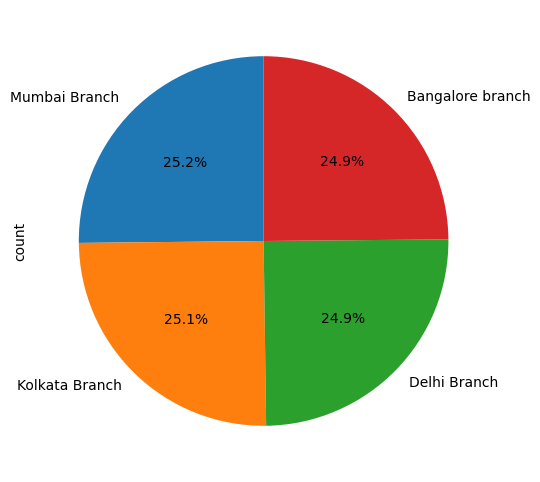

In [54]:
print(df['Bank_Branch'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    startangle=90
))

In [55]:
df['Loan_Repayment_Status'].value_counts()

Loan_Repayment_Status
Completed    77227
Pending      76641
Deferred     76616
Name: count, dtype: int64

Axes(0.1275,0.11;0.77x0.77)


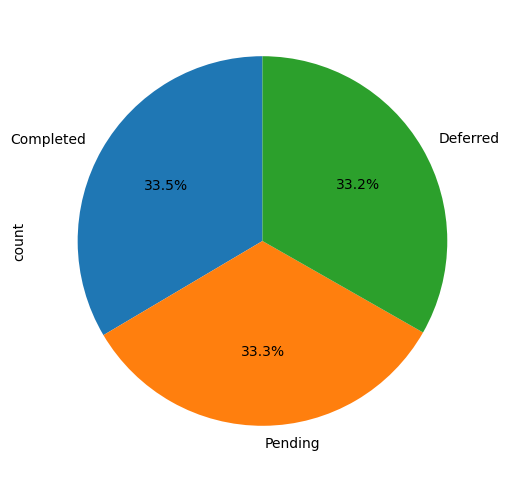

In [56]:
print(df['Loan_Repayment_Status'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    startangle=90
))

In [57]:
df['Branch_Manager'].value_counts()

Branch_Manager
Yuvraj  Rajan      6
Anahita Jhaveri    6
Nirvi Bhavsar      6
Ela Bala           6
Kismat Bala        6
                  ..
TaimurG opal       1
KAVYA COMAR        1
PURAB MANE         1
Tanya Date         1
KAVYA RATTA        1
Name: count, Length: 196973, dtype: int64

In [58]:
df

,Customer_ID,Customer_Name,Age,Gender,Occupation,Annual_Income,City,State,Loan_Type,Loan_Amount,...,EMI_Amount,Loan_Term,Loan_Approval_Date,Mobile_Number,Bank_Branch,Account_Balance,Interest_Rate,Loan_Repayment_Status,Disbursed_Amount,Branch_Manager
0,CUST00001,Ivan aWrrior,35,Other,Self-employed,904251,GIRIDIH,Karnataka,Home Loan,4292053,...,"45,912.85",360,2023-09-52,2452966579,Bangalore branch,330987,12.53,Completed,4292053,Ayesha Bhattacharyya
1,CUST00002,shamik bhardwaj,70,Female,Salaried,2176409,Delhi,Karnataka,Education Loan,739452,...,"13,198.19",84,8/6/2024,9.20E+11,Mumbai Branch,111656,12.37,Pending,739452,Adah Sha
2,CUST00003,uPrab Samra,36,Male,Student,418339,Raichur,Maharashtra,Car Loan,802308,...,"15,944.93",72,7/7/2042,9.19E+11,Bangalore branch,282128,12.62,Completed,802308,Indrajit Batra
3,CUST00004,Samar Balay,42,Female,Self-employed,1249905,TIRUPPUR,Karnataka,Gold Loan,234488,...,"7,805.61",36,2021-09-08,9.10E+11,Delhi Branch,19956,12.15,Pending,234488,Jayan Kuruvilla
4,CUST00005,Madhup Walla,53,Other,Unemployed,1081891,Hazaribagh,West Bengal,Education Loan,509615,...,"8,074.51",84,2020-12-30,9.14E+11,Mumbai Branch,124663,8.52,Pending,509615,Dhanush Raju
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230479,CUST230480,Indrajti Acharya,68,Male,Salaried,2141385,Bhopal,Tamil Nadu,Car Loan,1023340,...,"34,466.38",36,5/20/2022,9.17E+11,Bangalore branch,154080,12.97,Pending,1023340,Ana yShah
230480,CUST230481,Onkar Vala,59,Female,Retired,1619705,Mysore,Tamil Nadu,Personal Loan,636396,...,"57,395.34",12,7/18/2024,9.13E+11,Kolkata Branch,480904,14.85,Pending,636396,Hee rBadal
230481,CUST230482,Kanav Sahni,28,Female,Salaried,2207685,Dugr,Maharashtra,Personal Loan,540131,...,"47,386.59",12,3/17/2023,5430686383,Delhi Branch,116009,9.60,Completed,540131,Hridaan Ganesh
230482,CUST230483,Manikya Handa,62,Other,Salaried,1593678,Dindiugl,Karnataka,Home Loan,3241096,...,"39,428.14",360,6/26/2022,7297028102,Mumbai Branch,249823,14.40,Completed,3241096,Tejas Dayal


In [59]:
bins=[0,400000,800000,1400000,2500000]
labels=['low','median','high','verhigh']
df['Income_Status']=pd.cut(df['Annual_Income'],bins=bins,labels=labels,right=False)

In [60]:
df['Age'].describe()

count   230,484.00
mean         44.01
std          15.29
min          18.00
25%          31.00
50%          44.00
75%          57.00
max          70.00
Name: Age, dtype: float64

In [61]:
bins = [18, 30, 45, 60, 75]
labels = ['young', 'mid-age', 'adult', 'old-age']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [62]:
df['Interest_Rate'].describe()

count   230,484.00
mean         11.49
std           2.02
min           8.00
25%           9.75
50%          11.49
75%          13.24
max          15.00
Name: Interest_Rate, dtype: float64

In [63]:
bins = [0,10,13,15]
labels = ['low_interest','medium_interest','high_interest']
df['interestlevel'] = pd.cut(df['Interest_Rate'], bins=bins, labels=labels, right=False)

In [64]:
df['Credit_Score'].describe()

count   230,484.00
mean        575.14
std         158.92
min         300.00
25%         438.00
50%         575.00
75%         713.00
max         850.00
Name: Credit_Score, dtype: float64

In [65]:
bins = [0,450,650,850]
labels = ['low_credit','medium_credit','high_credit']
df['creditlevel'] = pd.cut(df['Credit_Score'], bins=bins, labels=labels, right=False)

In [66]:
df['creditlevel'].value_counts()

creditlevel
medium_credit    83909
high_credit      83569
low_credit       62543
Name: count, dtype: int64

In [67]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Age', 'Gender', 'Occupation',
       'Annual_Income', 'City', 'State', 'Loan_Type', 'Loan_Amount',
       'Loan_Status', 'Credit_Score', 'EMI_Amount', 'Loan_Term',
       'Loan_Approval_Date', 'Mobile_Number', 'Bank_Branch', 'Account_Balance',
       'Interest_Rate', 'Loan_Repayment_Status', 'Disbursed_Amount',
       'Branch_Manager', 'Income_Status', 'AgeGroup', 'interestlevel',
       'creditlevel'],
      dtype='object')

In [68]:
df.to_csv("cleaned_bank_data.csv", index=False)

In [69]:
df

,Customer_ID,Customer_Name,Age,Gender,Occupation,Annual_Income,City,State,Loan_Type,Loan_Amount,...,Bank_Branch,Account_Balance,Interest_Rate,Loan_Repayment_Status,Disbursed_Amount,Branch_Manager,Income_Status,AgeGroup,interestlevel,creditlevel
0,CUST00001,Ivan aWrrior,35,Other,Self-employed,904251,GIRIDIH,Karnataka,Home Loan,4292053,...,Bangalore branch,330987,12.53,Completed,4292053,Ayesha Bhattacharyya,high,mid-age,medium_interest,high_credit
1,CUST00002,shamik bhardwaj,70,Female,Salaried,2176409,Delhi,Karnataka,Education Loan,739452,...,Mumbai Branch,111656,12.37,Pending,739452,Adah Sha,verhigh,old-age,medium_interest,high_credit
2,CUST00003,uPrab Samra,36,Male,Student,418339,Raichur,Maharashtra,Car Loan,802308,...,Bangalore branch,282128,12.62,Completed,802308,Indrajit Batra,median,mid-age,medium_interest,low_credit
3,CUST00004,Samar Balay,42,Female,Self-employed,1249905,TIRUPPUR,Karnataka,Gold Loan,234488,...,Delhi Branch,19956,12.15,Pending,234488,Jayan Kuruvilla,high,mid-age,medium_interest,low_credit
4,CUST00005,Madhup Walla,53,Other,Unemployed,1081891,Hazaribagh,West Bengal,Education Loan,509615,...,Mumbai Branch,124663,8.52,Pending,509615,Dhanush Raju,high,adult,low_interest,medium_credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230479,CUST230480,Indrajti Acharya,68,Male,Salaried,2141385,Bhopal,Tamil Nadu,Car Loan,1023340,...,Bangalore branch,154080,12.97,Pending,1023340,Ana yShah,verhigh,old-age,medium_interest,high_credit
230480,CUST230481,Onkar Vala,59,Female,Retired,1619705,Mysore,Tamil Nadu,Personal Loan,636396,...,Kolkata Branch,480904,14.85,Pending,636396,Hee rBadal,verhigh,adult,high_interest,low_credit
230481,CUST230482,Kanav Sahni,28,Female,Salaried,2207685,Dugr,Maharashtra,Personal Loan,540131,...,Delhi Branch,116009,9.60,Completed,540131,Hridaan Ganesh,verhigh,young,low_interest,medium_credit
230482,CUST230483,Manikya Handa,62,Other,Salaried,1593678,Dindiugl,Karnataka,Home Loan,3241096,...,Mumbai Branch,249823,14.40,Completed,3241096,Tejas Dayal,verhigh,old-age,high_interest,low_credit


In [70]:
df.to_excel("cleaned_bank_data.xlsx", index=False)